### Урок 7. Многомерный статистический анализ. Линейная регрессия

#### Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], 
             [-0.18757272, 1.30337355, 5.12093014, 3.46363202], 
             [-0.81094525, 1.82463398, 5.79686488, 1.86159445], 
             [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], 
             [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], 
             [-0.62972637, 0.77750764, 2.84124027, 4.54410559], 
             [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], 
             [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], 
             [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], 
             [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
X.shape

(10, 4)

In [3]:
y = np.array([9.26193358, 9.700363, 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])
y.shape

(10,)

In [4]:
XT = X.transpose()
XT.shape, XT

((4, 10),
 array([[ 1.22401313, -0.18757272, -0.81094525,  0.75129018,  0.00972362,
         -0.62972637,  2.29536229,  0.0920418 ,  2.39252799,  0.54983815],
        [ 2.30868478,  1.30337355,  1.82463398,  2.67392052,  1.97367255,
          0.77750764,  1.81206697,  2.26971361,  3.17563985,  2.87988651],
        [ 3.03636353,  5.12093014,  5.79686488,  3.65529809,  2.50594319,
          2.84124027,  1.95026215,  7.47708735,  3.61420599,  1.65752765],
        [ 2.69287214,  3.46363202,  1.86159445,  1.66746094,  1.69755173,
          4.54410559,  1.51874636,  2.61081203,  5.10773362,  1.59635987]]))

In [5]:
b1 = (np.mean(XT[0] * XT[1]) - np.mean(XT[0]) * np.mean(XT[1])) / (np.mean(XT[0] ** 2) - np.mean(XT[0]) ** 2)
b0 = np.mean(XT[1]) - b1 * np.mean(XT[0])
b0, b1
print(f'Линейная регрессия: y = {b0.round(2)} + {b1.round(2)} * x')

Линейная регрессия: y = 1.88 + 0.38 * x


In [6]:
b1 = (np.mean(XT[0] * XT[2]) - np.mean(XT[0]) * np.mean(XT[2])) / (np.mean(XT[0] ** 2) - np.mean(XT[0]) ** 2)
b0 = np.mean(XT[2]) - b1 * np.mean(XT[0])
b0, b1
print(f'Линейная регрессия: y = {b0.round(2)} + {b1.round(2)} * x')

Линейная регрессия: y = 4.15 + -0.68 * x


In [7]:
b1 = (np.mean(XT[0] * XT[3]) - np.mean(XT[0]) * np.mean(XT[3])) / (np.mean(XT[0] ** 2) - np.mean(XT[0]) ** 2)
b0 = np.mean(XT[3]) - b1 * np.mean(XT[0])
b0, b1
print(f'Линейная регрессия: y = {b0.round(2)} + {b1.round(2)} * x')

Линейная регрессия: y = 2.62 + 0.1 * x


In [8]:
b1 = (np.mean(XT[1] * XT[2]) - np.mean(XT[1]) * np.mean(XT[2])) / (np.mean(XT[1] ** 2) - np.mean(XT[1]) ** 2)
b0 = np.mean(XT[2]) - b1 * np.mean(XT[1])
b0, b1
print(f'Линейная регрессия: y = {b0.round(2)} + {b1.round(2)} * x')

Линейная регрессия: y = 4.27 + -0.24 * x


In [9]:
b1 = (np.mean(XT[1] * XT[3]) - np.mean(XT[1]) * np.mean(XT[3])) / (np.mean(XT[1] ** 2) - np.mean(XT[1]) ** 2)
b0 = np.mean(XT[3]) - b1 * np.mean(XT[1])
b0, b1
print(f'Линейная регрессия: y = {b0.round(2)} + {b1.round(2)} * x')

Линейная регрессия: y = 3.22 + -0.26 * x


In [10]:
b1 = (np.mean(XT[2] * XT[3]) - np.mean(XT[2]) * np.mean(XT[3])) / (np.mean(XT[2] ** 2) - np.mean(XT[2]) ** 2)
b0 = np.mean(XT[3]) - b1 * np.mean(XT[1])
b0, b1
print(f'Линейная регрессия: y = {b0.round(2)} + {b1.round(2)} * x')

Линейная регрессия: y = 2.48 + 0.09 * x


#### Задача 2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1) Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

2) Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

3) Посчитайте коэффициент детерминации.

4) Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

5) (доп) Посчитать среднюю ошибку аппроксимации

In [11]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [12]:
b1 = (np.mean(salary * scoring ) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)
print(f'Коэффициенты линейной регрессии: {b1}, {b0}')
print(f'Линейная регрессия: y = {b0.round(2)} + {b1.round(2)} * x')

Коэффициенты линейной регрессии: 2.620538882402765, 444.1773573243596
Линейная регрессия: y = 444.18 + 2.62 * x


In [13]:
x2 = pd.DataFrame(salary)
x2.shape

(10, 1)

In [14]:
first = np.ones((x2.shape[0], 1))  # добавляем столбец с единицами
x2 = np.hstack((first, x2))
x2.shape

(10, 2)

In [15]:
XTX = x2.T.dot(x2)
np.linalg.det(XTX)

349464.00000000023

In [16]:
y2 = pd.DataFrame(scoring)

XTX_ = np.linalg.inv(XTX)
b = XTX_.dot(x2.T).dot(y2)
print(f'Линейная регрессия: y = {b[0].round(2)} + {b[1].round(2)} * x')

Линейная регрессия: y = [444.18] + [2.62] * x


По обоим методам коэффициенты равны

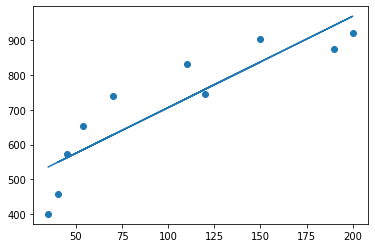

In [17]:
#  Строим график по данным

Ox = salary
Oy = b0 + b1 * Ox
plt.scatter(salary, scoring)
plt.plot(Ox, Oy)

In [18]:
#  Считаем коэф. детерминации

pred_score = b0 + b1 * salary
R = pred_score.var() / scoring.var()
print(f'Коэффициент детерминации = {R}')

Коэффициент детерминации = 0.7876386635293678


In [19]:
#  Оценка с помощью F-критерия Фишера

k1 = 1
k2 = salary.shape[0] - k1 - 1
T1 = (R / (1 - R)) * (k2 / k1)
T1

29.67164085966437

In [20]:
alpha = 0.05

F_test = stats.f.ppf(1 - alpha, k1, k2)
F_test

5.317655071578714

In [21]:
if T1 > F_test:
    print(f'Уравнение регрессии значимо - {T1.round(2)} > {F_test.round(2)}')
else:
    print(f'Уравнение регрессии не значимо - {T1.round(2)} < {F_test.round(2)}')

Уравнение регрессии значимо - 29.67 > 5.32


In [22]:
#  Средняя ошибка аппроксимации

er = np.abs((scoring - pred_score) / scoring).mean()
print(f'Средняя ошибка аппроксимации = {er.round(4)}')

Средняя ошибка аппроксимации = 0.1147
